In [1]:
import os
os.chdir('P:\SAMPLE DATA')

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, precision_recall_curve
from sklearn.datasets import make_classification

from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import time
from contextlib import contextmanager

In [3]:
df=pd.read_excel('2016.xlsx')

In [4]:
df.shape

(591933, 13)

In [5]:
df.head(10)

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,InvNet (SUM),Member Type,Town,Member Join Date
0,662914,Monthly Mobile Contract,NaN,2011-07-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-120.30,Agrevise - Full,Northampton,2008-05-08
1,662914,Monthly Mobile Contract,NaN,2011-10-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-73.37,Agrevise - Full,Northampton,2008-05-08
2,693482,Miscellaneous Items,NaN,2012-03-01,2017-01-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,King's Lynn,1997-03-20
3,663686,Miscellaneous Items,NaN,2012-09-11,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,2nd Account,Spalding,2011-06-08
4,671350,Miscellaneous Items,NaN,2012-10-19,2016-07-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1990-02-20
5,693412,Miscellaneous Items,NaN,2012-11-28,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Fakenham,1994-03-17
6,693225,Miscellaneous Items,NaN,2013-01-31,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Kings Lynn,1993-09-20
7,664339,Miscellaneous Items,NaN,2013-05-21,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Waitrose Farming Partnership - Full,Attleborough,2013-05-08
8,663201,Miscellaneous Items,NaN,2013-06-20,2016-05-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Colchester,2009-06-04
9,693264,Miscellaneous Items,NaN,2013-08-16,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1966-04-25


In [6]:
df.isnull().sum()

CMemNo                   0
Description             40
Failed              589538
InvDate                  0
InvPaymentDate           0
ProdCategory             1
ProdCode                 1
ProductAreaName          1
SuppID               26924
InvNet (SUM)             1
Member Type              0
Town                     0
Member Join Date         0
dtype: int64

In [7]:
df['Failed']=df['Failed'].fillna('success')

In [8]:
df.isnull().sum()

CMemNo                  0
Description            40
Failed                  0
InvDate                 0
InvPaymentDate          0
ProdCategory            1
ProdCode                1
ProductAreaName         1
SuppID              26924
InvNet (SUM)            1
Member Type             0
Town                    0
Member Join Date        0
dtype: int64

In [9]:
df['Failed'].replace({"success":1,"Failed":0}, inplace=True)

In [10]:
df['Failed'].value_counts().unique()

array([589538,   2395], dtype=int64)

In [17]:
df1=df.sample(n=50000)

In [18]:
df1.head()

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,sales,Member Type,Town,Member Join Date,Zerosales,refunded
509073,693019,KNIGHTBRIDGE GROUND SPIKE FOR LED,1,2016-12-02,2017-01-28,Building Materials,BU-GEN,Building Materials,T00015,6.33,Full,Dereham,1998-07-28,0,0
370686,663034,adsl 01525290396 september 2016,1,2016-09-14,2016-10-28,Fixed & Broadband,MS-BBAND,Telecoms,I00020,21.50,2nd Account,Milton Keynes,2008-09-08,0,0
211762,693536,Regular Kerosene,1,2016-06-08,2016-07-30,Liquid,FL-RK,Liquid Fuel,C00065,1152.08,Full,Kings Lynn,1993-03-18,0,0
305283,665251,Skylark Garden Ctr -,1,2016-08-02,2016-08-26,Charge card,MS-BARCLAYCARD,Non Service Charge,B00271,42.98,Full,March,2015-12-23,0,0
216270,671738,Brewers Grains,1,2016-06-13,2016-07-26,Feed,FD-BREWER,Feed & Animal Health & Vets Fees,D00123,788.48,Associate,Norwich,1996-08-19,0,0


In [13]:
df.rename(columns={'InvNet (SUM)':'sales'},inplace=True)

In [14]:
df['Zerosales'] = (df.sales == 0).astype(int)

In [15]:
df['refunded']= (df.sales < 0).astype(int)

In [16]:
df.head(10)

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,sales,Member Type,Town,Member Join Date,Zerosales,refunded
0,662914,Monthly Mobile Contract,1,2011-07-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-120.30,Agrevise - Full,Northampton,2008-05-08,0,1
1,662914,Monthly Mobile Contract,1,2011-10-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-73.37,Agrevise - Full,Northampton,2008-05-08,0,1
2,693482,Miscellaneous Items,1,2012-03-01,2017-01-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,King's Lynn,1997-03-20,0,1
3,663686,Miscellaneous Items,1,2012-09-11,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,2nd Account,Spalding,2011-06-08,0,1
4,671350,Miscellaneous Items,1,2012-10-19,2016-07-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1990-02-20,0,1
5,693412,Miscellaneous Items,1,2012-11-28,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Fakenham,1994-03-17,0,1
6,693225,Miscellaneous Items,1,2013-01-31,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Kings Lynn,1993-09-20,0,1
7,664339,Miscellaneous Items,1,2013-05-21,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Waitrose Farming Partnership - Full,Attleborough,2013-05-08,0,1
8,663201,Miscellaneous Items,1,2013-06-20,2016-05-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Colchester,2009-06-04,0,1
9,693264,Miscellaneous Items,1,2013-08-16,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1966-04-25,0,1


In [19]:
df.groupby('Failed')['refunded'].sum().reset_index()

,Failed,refunded
0,0,73
1,1,25878


In [20]:
df2=df.loc[(df['Failed'] == 0)]

In [21]:
df2.head(10)

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,sales,Member Type,Town,Member Join Date,Zerosales,refunded
969,662163,Tyres & Valve Hardware,0,2016-01-28,2016-06-26,Tyres,MC-T,Machinery,S00058,80.96,Full,Kings Lynn,2005-07-05,0,0
1041,662163,"Machinery Tools, Vehicle Parts & Spares",0,2016-01-29,2016-06-26,General - Machinery,MC-MS,Machinery,S00058,58.00,Full,Kings Lynn,2005-07-05,0,0
3573,694907,Blended Feed,0,2016-02-03,2016-03-26,Feed,FD-B,Feed & Animal Health & Vets Fees,P00065,3494.08,Associate,Saffron Walden,2015-08-05,0,0
4642,694907,Gas Oil / ULSG,0,2016-02-04,2016-03-31,Liquid,FL-GO,Liquid Fuel,W00052,1052.40,Associate,Saffron Walden,2015-08-05,0,0
4663,693145,"Machinery Tools, Vehicle Parts & Spares",0,2016-02-04,2016-04-26,General - Machinery,MC-MS,Machinery,D00030,892.82,Full,King's Lynn,2002-10-10,0,0
4681,671194,Building Supplies,0,2016-02-04,2016-07-26,Building Materials,BU-GEN,Building Materials,W00139,29.12,Full,Norwich,1990-01-01,0,0
6693,694907,Blended Feed,0,2016-02-08,2016-03-26,Feed,FD-B,Feed & Animal Health & Vets Fees,P00065,3138.96,Associate,Saffron Walden,2015-08-05,0,0
6835,693145,"Machinery Tools, Vehicle Parts & Spares",0,2016-02-08,2016-04-26,General - Machinery,MC-MS,Machinery,D00030,811.23,Full,King's Lynn,2002-10-10,0,0
10859,693145,Horse Feed 20 kg Speedi Beet Horse feed,0,2016-02-11,2016-04-26,Feed,FD-H,Feed & Animal Health & Vets Fees,B00020,196.40,Full,King's Lynn,2002-10-10,0,0
12807,694907,Blended Feed,0,2016-02-12,2016-03-26,Feed,FD-B,Feed & Animal Health & Vets Fees,P00065,3311.58,Associate,Saffron Walden,2015-08-05,0,0


In [22]:
df2.shape

(2395, 15)

In [26]:
df2.CMemNo.unique().shape

(66,)

In [27]:
df2=df.loc[(df['Failed'] == 1)]

In [28]:
df2

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,sales,Member Type,Town,Member Join Date,Zerosales,refunded
0,662914,Monthly Mobile Contract,1,2011-07-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-120.30,Agrevise - Full,Northampton,2008-05-08,0,1
1,662914,Monthly Mobile Contract,1,2011-10-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-73.37,Agrevise - Full,Northampton,2008-05-08,0,1
2,693482,Miscellaneous Items,1,2012-03-01,2017-01-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,King's Lynn,1997-03-20,0,1
3,663686,Miscellaneous Items,1,2012-09-11,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,2nd Account,Spalding,2011-06-08,0,1
4,671350,Miscellaneous Items,1,2012-10-19,2016-07-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1990-02-20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591928,663975,Propane 13kg,1,2017-12-31,2017-02-26,LPG & Solid fuels,GS-PROP13,LPG & Solid Fuel,C00190,40.80,Full,Ipswich,2012-07-06,0,0
591929,663975,Propane 19kg,1,2017-12-31,2017-02-26,LPG & Solid fuels,GS-PROP19,LPG & Solid Fuel,C00190,20.02,Full,Ipswich,2012-07-06,0,0
591930,663975,Propane 47kg,1,2017-12-31,2017-02-26,LPG & Solid fuels,GS-PROP47,LPG & Solid Fuel,C00190,40.75,Full,Ipswich,2012-07-06,0,0
591931,693468,Delivery charge LPG,1,2017-12-31,2017-02-26,LPG & Solid fuels,GS-DELY,LPG & Solid Fuel,C00190,4.76,Associate,Kings Lynn,1986-02-27,0,0


In [22]:
df1.head()

,CMemNo,Failed,ProdCategory,sales,Member Type,Town,Zerosales,refunded,year of joning,month of joining,day of joining
509073,693019,1,Building Materials,6.33,Full,Dereham,0,0,1998,7,28
370686,663034,1,Fixed & Broadband,21.50,2nd Account,Milton Keynes,0,0,2008,9,8
211762,693536,1,Liquid,1152.08,Full,Kings Lynn,0,0,1993,3,18
305283,665251,1,Charge card,42.98,Full,March,0,0,2015,12,23
216270,671738,1,Feed,788.48,Associate,Norwich,0,0,1996,8,19


In [19]:
df1.drop(['Description','InvDate','InvPaymentDate','ProductAreaName','SuppID'],axis=1,inplace=True)

In [20]:
#members joined year and month
df1['year of joning']=pd.to_datetime(df1["Member Join Date"], format="%d/%m/%Y").dt.year
df1['month of joining']=pd.to_datetime(df1["Member Join Date"], format="%d/%m/%Y").dt.month
df1['day of joining']=pd.to_datetime(df1["Member Join Date"], format="%d/%m/%Y").dt.day

In [21]:
df1.drop(['ProdCode','Member Join Date'],axis=1,inplace=True)

In [23]:
df1['ProdCategory'].unique()

array(['Building Materials', 'Fixed & Broadband', 'Liquid', 'Charge card',
       'Feed', 'General - Machinery', 'Non HH, mains gas, MOP',
       'General - Supplies', 'Fuel Cards', 'Fertiliser', 'Agrochemicals',
       'LPG & Solid fuels', 'Livestock Products', 'Accounts', 'Insurance',
       'Seed', 'Mobile', 'Rebates to Members', 'Tyres', 'Hardware',
       'Vet fees & Animal Health / Semen', 'Hire', 'Non Levy',
       'Agrochemicals Non Levy', 'General Services', 'Electricity HH',
       'Tractor Hire', 'Capital', 'Labour', 'Rodenticides',
       'Renewable Services', 'Liquid 10,000Ltrs+',
       'General Supplies Non Levy', 'Build Materials Non Levy',
       'Seed Non Levy'], dtype=object)

In [24]:
from collections import Counter

In [41]:
def cumulatively_categorise(column,threshold=0.60,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
        break
  #Append the category Other to the list
  categories_list.append('Other Area')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other Area')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  else:
    return new_column

In [26]:
df2=df1.copy()

In [27]:
#Call the function with a default threshold of 75%
transformed_column,new_category_list=cumulatively_categorise(df1['ProdCategory'],return_categories_list=True)

In [28]:
transformed_column.describe()

count              50000
unique                11
top       Other products
freq                9347
Name: ProdCategory, dtype: object

In [29]:
new_category_list

['General - Machinery',
 'Agrochemicals',
 'Building Materials',
 'Fuel Cards',
 'General - Supplies',
 'Charge card',
 'Liquid',
 'Non HH, mains gas, MOP',
 'Fixed & Broadband',
 'Mobile',
 'Other products']

In [30]:
transformed_column.head()

509073    Building Materials
370686     Fixed & Broadband
211762                Liquid
305283           Charge card
216270        Other products
Name: ProdCategory, dtype: object

In [31]:
df1.drop('ProdCategory',axis=1,inplace=True)

In [32]:
df1=pd.concat([df1,transformed_column],axis=1)

In [33]:
df1.head(10)

,CMemNo,Failed,sales,Member Type,Town,Zerosales,refunded,year of joning,month of joining,day of joining,ProdCategory
509073,693019,1,6.33,Full,Dereham,0,0,1998,7,28,Building Materials
370686,663034,1,21.50,2nd Account,Milton Keynes,0,0,2008,9,8,Fixed & Broadband
211762,693536,1,1152.08,Full,Kings Lynn,0,0,1993,3,18,Liquid
305283,665251,1,42.98,Full,March,0,0,2015,12,23,Charge card
216270,671738,1,788.48,Associate,Norwich,0,0,1996,8,19,Other products
188675,662655,1,20.26,Full,Norwich,0,0,2007,8,9,General - Machinery
575462,671746,1,141.71,Full,Cromer,0,0,1996,12,18,General - Machinery
126512,663482,1,1689.43,Associate,Melton Constable,0,0,2010,11,2,"Non HH, mains gas, MOP"
261530,665117,1,14.07,Associate,Norwich,0,0,2016,1,15,Fixed & Broadband
259204,663270,1,4.80,Associate,Eye,0,0,2009,10,28,Building Materials


In [35]:
transformed_column,new_category_list=cumulatively_categorise(df1['Member Type'],return_categories_list=True)

In [36]:
transformed_column.describe()

count     50000
unique        4
top        Full
freq      30399
Name: Member Type, dtype: object

In [37]:
transformed_column.unique()

array(['Full', '2nd Account', 'Associate', 'Others'], dtype=object)

In [38]:
df1.drop('Member Type',axis=1,inplace=True)

In [39]:
df1=pd.concat([df1,transformed_column],axis=1)

In [40]:
df1.head()

,CMemNo,Failed,sales,Town,Zerosales,refunded,year of joning,month of joining,day of joining,ProdCategory,Member Type
509073,693019,1,6.33,Dereham,0,0,1998,7,28,Building Materials,Full
370686,663034,1,21.50,Milton Keynes,0,0,2008,9,8,Fixed & Broadband,2nd Account
211762,693536,1,1152.08,Kings Lynn,0,0,1993,3,18,Liquid,Full
305283,665251,1,42.98,March,0,0,2015,12,23,Charge card,Full
216270,671738,1,788.48,Norwich,0,0,1996,8,19,Other products,Associate


In [42]:
transformed_column,new_category_list=cumulatively_categorise(df1['Town'],return_categories_list=True)

In [43]:
transformed_column.describe()

count          50000
unique            18
top       Other Area
freq           19476
Name: Town, dtype: object

In [44]:
df1.drop('Town',axis=1,inplace=True)

In [45]:
df1=pd.concat([df1,transformed_column],axis=1)

In [46]:
df1.head()

,CMemNo,Failed,sales,Zerosales,refunded,year of joning,month of joining,day of joining,ProdCategory,Member Type,Town
509073,693019,1,6.33,0,0,1998,7,28,Building Materials,Full,Dereham
370686,663034,1,21.50,0,0,2008,9,8,Fixed & Broadband,2nd Account,Other Area
211762,693536,1,1152.08,0,0,1993,3,18,Liquid,Full,Kings Lynn
305283,665251,1,42.98,0,0,2015,12,23,Charge card,Full,March
216270,671738,1,788.48,0,0,1996,8,19,Other products,Associate,Norwich


In [47]:
df1.shape

(50000, 11)

In [48]:
df1.isnull().sum()

CMemNo              0
Failed              0
sales               0
Zerosales           0
refunded            0
year of joning      0
month of joining    0
day of joining      0
ProdCategory        0
Member Type         0
Town                0
dtype: int64

In [54]:
#df1=df1.fillna(0)

In [49]:
df1['ProdCategory'].unique()

array(['Building Materials', 'Fixed & Broadband', 'Liquid', 'Charge card',
       'Other products', 'General - Machinery', 'Non HH, mains gas, MOP',
       'General - Supplies', 'Fuel Cards', 'Agrochemicals', 'Mobile'],
      dtype=object)

In [50]:
df1['Member Type'].unique()

array(['Full', '2nd Account', 'Associate', 'Others'], dtype=object)

In [51]:
df1['Town'].unique()

array(['Dereham', 'Other Area', 'Kings Lynn', 'March', 'Norwich', 'Holt',
       'Attleborough', 'Wisbech', 'Thetford', "King's Lynn", 'Fakenham',
       'Gt Yarmouth', 'Great Yarmouth', 'Wymondham', 'North Walsham',
       'Huntingdon', 'Diss', 'Beccles'], dtype=object)

In [52]:
categoricals = ['ProdCategory', 'Member Type','Town']
ohe = OneHotEncoder(sparse=False)
cat_matrix_train = ohe.fit_transform(df1.loc[:, categoricals])
data_ohe = pd.DataFrame(cat_matrix_train,
                           columns=ohe.get_feature_names(categoricals), 
                           index=df1.index)
data_ohe.columns = ['Building Materials', 'Fixed & Broadband', 'Liquid', 'Charge card',
       'Other products', 'General - Machinery', 'Non HH, mains gas, MOP',
       'General - Supplies', 'Fuel Cards', 'Agrochemicals', 'Mobile','Full', 
                    '2nd Account', 'Associate', 'Others','Dereham', 'Other Area', 'Kings Lynn', 
                    'March', 'Norwich', 'Holt',
       'Attleborough', 'Wisbech', 'Thetford', "King's Lynn", 'Fakenham',
       'Gt Yarmouth', 'Great Yarmouth', 'Wymondham', 'North Walsham',
       'Huntingdon', 'Diss', 'Beccles']
df1 = pd.concat([df1, data_ohe], axis=1)
df1.head(10)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CMemNo,Failed,sales,Zerosales,refunded,year of joning,month of joining,day of joining,ProdCategory,Member Type,...,Thetford,King's Lynn,Fakenham,Gt Yarmouth,Great Yarmouth,Wymondham,North Walsham,Huntingdon,Diss,Beccles
509073,693019,1,6.33,0,0,1998,7,28,Building Materials,Full,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370686,663034,1,21.50,0,0,2008,9,8,Fixed & Broadband,2nd Account,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
211762,693536,1,1152.08,0,0,1993,3,18,Liquid,Full,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305283,665251,1,42.98,0,0,2015,12,23,Charge card,Full,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
216270,671738,1,788.48,0,0,1996,8,19,Other products,Associate,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
188675,662655,1,20.26,0,0,2007,8,9,General - Machinery,Full,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
575462,671746,1,141.71,0,0,1996,12,18,General - Machinery,Full,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
126512,663482,1,1689.43,0,0,2010,11,2,"Non HH, mains gas, MOP",Associate,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
261530,665117,1,14.07,0,0,2016,1,15,Fixed & Broadband,Associate,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
259204,663270,1,4.80,0,0,2009,10,28,Building Materials,Associate,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
df1.drop(['ProdCategory','Member Type','Town'],axis=1,inplace=True)

In [65]:
df1.head(5)

,CMemNo,Failed,sales,Zerosales,refunded,year of joning,month of joining,day of joining,Building Materials,Fixed & Broadband,...,Thetford,King's Lynn,Fakenham,Gt Yarmouth,Great Yarmouth,Wymondham,North Walsham,Huntingdon,Diss,Beccles
509073,693019,1,6.33,0,0,1998,7,28,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370686,663034,1,21.50,0,0,2008,9,8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
211762,693536,1,1152.08,0,0,1993,3,18,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305283,665251,1,42.98,0,0,2015,12,23,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
216270,671738,1,788.48,0,0,1996,8,19,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [75]:
df1.dtypes

CMemNo                      int32
Failed                      int32
Zerosales                   int32
refunded                    int32
year of joning              int32
month of joining            int32
day of joining              int32
Building Materials          int32
Fixed & Broadband           int32
Liquid                      int32
Charge card                 int32
Other products              int32
General - Machinery         int32
Non HH, mains gas, MOP      int32
General - Supplies          int32
Fuel Cards                  int32
Agrochemicals               int32
Mobile                      int32
Full                        int32
2nd Account                 int32
Associate                   int32
Others                      int32
Dereham                     int32
Other Area                  int32
Kings Lynn                  int32
March                       int32
Norwich                     int32
Holt                        int32
Attleborough                int32
Wisbech       

In [61]:
df1.columns

Index(['CMemNo', 'Failed', 'sales', 'Zerosales', 'refunded', 'year of joning',
       'month of joining', 'day of joining', 'Building Materials',
       'Fixed & Broadband', 'Liquid', 'Charge card', 'Other products',
       'General - Machinery', 'Non HH, mains gas, MOP', 'General - Supplies',
       'Fuel Cards', 'Agrochemicals', 'Mobile', 'Full', '2nd Account',
       'Associate', 'Others', 'Dereham', 'Other Area', 'Kings Lynn', 'March',
       'Norwich', 'Holt', 'Attleborough', 'Wisbech', 'Thetford', 'King's Lynn',
       'Fakenham', 'Gt Yarmouth', 'Great Yarmouth', 'Wymondham',
       'North Walsham', 'Huntingdon', 'Diss', 'Beccles'],
      dtype='object')

In [58]:
df2=df1.copy()

In [68]:
df1.shape

(50000, 41)

In [72]:
df3=df2['sales']

In [70]:
df1=df1.loc[:, df1.columns != 'sales'].astype(int)

In [74]:
df1

,CMemNo,Failed,Zerosales,refunded,year of joning,month of joining,day of joining,Building Materials,Fixed & Broadband,Liquid,...,King's Lynn,Fakenham,Gt Yarmouth,Great Yarmouth,Wymondham,North Walsham,Huntingdon,Diss,Beccles,sales
509073,693019,1,0,0,1998,7,28,0,1,0,...,0,0,0,0,0,0,0,0,0,6.33
370686,663034,1,0,0,2008,9,8,0,0,0,...,0,0,0,0,0,1,0,0,0,21.50
211762,693536,1,0,0,1993,3,18,0,0,0,...,0,1,0,0,0,0,0,0,0,1152.08
305283,665251,1,0,0,2015,12,23,0,0,1,...,0,0,1,0,0,0,0,0,0,42.98
216270,671738,1,0,0,1996,8,19,0,0,0,...,0,0,0,0,1,0,0,0,0,788.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190019,671029,1,0,0,1990,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,13.84
173529,693098,1,0,0,1985,7,11,0,0,0,...,0,0,0,0,1,0,0,0,0,961.29
263064,663032,1,0,0,2008,8,28,0,1,0,...,0,0,0,0,0,1,0,0,0,226.00
476579,694533,1,0,0,2015,4,30,0,0,0,...,0,0,0,0,0,1,0,0,0,4873.67


In [73]:
df1=pd.concat([df1,df3],axis=1)

,CMemNo,Failed,Zerosales,refunded,year of joning,month of joining,day of joining,Building Materials,Fixed & Broadband,Liquid,...,King's Lynn,Fakenham,Gt Yarmouth,Great Yarmouth,Wymondham,North Walsham,Huntingdon,Diss,Beccles,sales
CMemNo,1.000000,-0.003626,0.005889,-0.019642,-0.415191,-0.013704,0.222158,-0.004208,0.020669,-0.000370,...,0.118629,0.099729,-0.132030,0.005662,0.071825,-0.244481,0.087071,-0.038762,0.049304,-0.025006
Failed,-0.003626,1.000000,-0.003277,0.009636,-0.012803,-0.013563,0.004856,0.002106,-0.004758,0.008281,...,-0.086855,-0.009106,0.007204,0.005914,0.001167,0.022598,0.001603,0.008077,0.007320,0.002509
Zerosales,0.005889,-0.003277,1.000000,-0.016011,0.001996,-0.004832,-0.005642,-0.016320,-0.001711,-0.014949,...,-0.001722,-0.004957,-0.000712,-0.007332,0.010178,-0.013396,0.006717,0.010045,0.001491,-0.021856
refunded,-0.019642,0.009636,-0.016011,1.000000,-0.010255,-0.001851,-0.008303,0.003128,-0.023105,-0.044634,...,-0.001599,-0.001365,0.000082,-0.007606,0.001994,-0.001568,-0.003676,0.005563,0.002899,-0.107151
year of joning,-0.415191,-0.012803,0.001996,-0.010255,1.000000,0.067084,-0.208623,-0.056445,0.000753,0.076236,...,-0.007102,-0.032373,0.051522,-0.049887,-0.202984,0.338397,-0.075714,0.074689,-0.078591,0.016219
month of joining,-0.013704,-0.013563,-0.004832,-0.001851,0.067084,1.000000,0.072211,0.006786,0.004817,-0.016678,...,-0.003060,0.018506,0.019471,-0.040570,-0.072724,0.060773,-0.004111,-0.007334,0.008890,-0.004803
day of joining,0.222158,0.004856,-0.005642,-0.008303,-0.208623,0.072211,1.000000,-0.010173,-0.006189,-0.003528,...,0.060822,0.056614,-0.075077,-0.026029,-0.021162,-0.077397,0.076401,-0.012268,0.034251,-0.016182
Building Materials,-0.004208,0.002106,-0.016320,0.003128,-0.056445,0.006786,-0.010173,1.000000,-0.140537,-0.102806,...,0.009691,-0.001255,0.017627,-0.002655,0.011715,-0.018303,0.007566,0.013039,-0.012723,0.066013
Fixed & Broadband,0.020669,-0.004758,-0.001711,-0.023105,0.000753,0.004817,-0.006189,-0.140537,1.000000,-0.091819,...,-0.013617,0.015146,-0.016407,0.006960,0.012286,-0.057065,0.001915,-0.003118,0.021978,-0.050890
Liquid,-0.000370,0.008281,-0.014949,-0.044634,0.076236,-0.016678,-0.003528,-0.102806,-0.091819,1.000000,...,0.000153,-0.026418,0.002897,0.031101,-0.029346,0.033469,-0.009790,-0.024955,0.006457,-0.048290


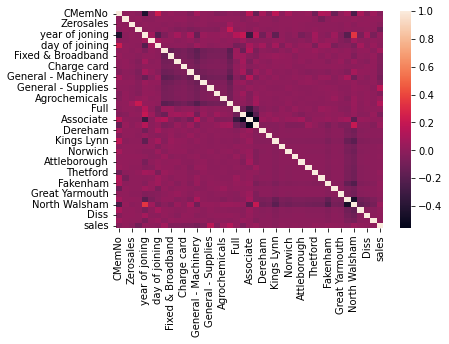

<Figure size 1440x1152 with 0 Axes>

In [76]:
sns.heatmap(df1
            .corr())
plt.figure(figsize=(20, 16))
df1.corr()

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Failed', ylabel='count'>

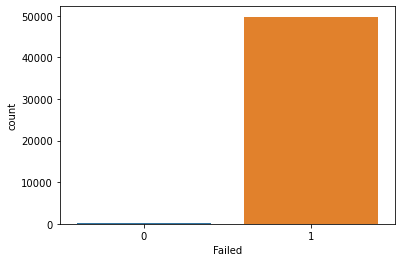

In [77]:
sns.countplot(df1.Failed)

In [ ]:
#plot churned clients by gender

plt.figure(figsize=(15, 8))
sns.countplot(df1.ProductAreaName, hue = df1.Failed)
plt.ylabel('Count', fontsize=30)
plt.xlabel('ProductAreaName', fontsize = 30)
plt.title("Churned Clients by ProductAreaName", fontsize = 35)
plt.legend(labels=['Stayed', 'Churned'], bbox_to_anchor=(1, 1), fontsize= 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
sns.despine()

In [78]:
df1.columns

Index(['CMemNo', 'Failed', 'Zerosales', 'refunded', 'year of joning',
       'month of joining', 'day of joining', 'Building Materials',
       'Fixed & Broadband', 'Liquid', 'Charge card', 'Other products',
       'General - Machinery', 'Non HH, mains gas, MOP', 'General - Supplies',
       'Fuel Cards', 'Agrochemicals', 'Mobile', 'Full', '2nd Account',
       'Associate', 'Others', 'Dereham', 'Other Area', 'Kings Lynn', 'March',
       'Norwich', 'Holt', 'Attleborough', 'Wisbech', 'Thetford', 'King's Lynn',
       'Fakenham', 'Gt Yarmouth', 'Great Yarmouth', 'Wymondham',
       'North Walsham', 'Huntingdon', 'Diss', 'Beccles', 'sales'],
      dtype='object')

In [80]:
features =['CMemNo','Zerosales', 'refunded', 'year of joning',
       'month of joining', 'day of joining', 'Building Materials',
       'Fixed & Broadband', 'Liquid', 'Charge card', 'Other products',
       'General - Machinery', 'Non HH, mains gas, MOP', 'General - Supplies',
       'Fuel Cards', 'Agrochemicals', 'Mobile', 'Full', '2nd Account',
       'Associate', 'Others', 'Dereham', 'Other Area', 'Kings Lynn', 'March',
       'Norwich', 'Holt', 'Attleborough', 'Wisbech', 'Thetford', "King's Lynn",
       'Fakenham', 'Gt Yarmouth', 'Great Yarmouth', 'Wymondham',
       'North Walsham', 'Huntingdon', 'Diss', 'Beccles', 'sales']

X = df1.loc[:, features]
y = df1.loc[:, 'Failed']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state = 4444)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state = 4444)

X_train.drop('CMemNo', axis = 1, inplace = True)
X_val.drop('CMemNo', axis = 1, inplace = True)

In [81]:
# check version number
import imblearn
print(imblearn.__version__)

0.9.1


In [82]:
#Oversample minority class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=4444)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)

In [83]:
X_train

,Zerosales,refunded,year of joning,month of joining,day of joining,Building Materials,Fixed & Broadband,Liquid,Charge card,Other products,...,King's Lynn,Fakenham,Gt Yarmouth,Great Yarmouth,Wymondham,North Walsham,Huntingdon,Diss,Beccles,sales
541982,0,0,2006,3,13,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,32.51
349788,0,0,2010,7,8,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,113.65
47107,0,0,1993,3,11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,576.00
432575,0,0,1966,9,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32.00
243694,0,0,2012,2,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56311,0,0,1990,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,46.96
129717,0,0,1975,2,17,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1510.50
288388,0,1,2008,11,17,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-2.13
157360,0,0,2007,8,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019.00


In [84]:
#logistic regression
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_resampled)
X_val_scaled = ss.transform(X_val)
lr = LogisticRegression()
lr.fit(X_train_scaled, y_resampled)
y_preds_lr = lr.predict(X_val_scaled)
print(classification_report(y_test, y_preds_lr))

              precision    recall  f1-score   support

           0       0.00      0.14      0.01        58
           1       0.99      0.73      0.84      9942

    accuracy                           0.73     10000
   macro avg       0.50      0.44      0.43     10000
weighted avg       0.99      0.73      0.84     10000



In [85]:
#save test set as CSV for streamlit app
sample = X_train_val
sample.to_csv(path_or_buf = 'streaaaamey.csv', index = False)

In [86]:
import pickle
from sklearn.metrics import fbeta_score, precision_score

              precision    recall  f1-score   support

           0       0.02      0.62      0.04        48
           1       1.00      0.86      0.93      9952

    accuracy                           0.86     10000
   macro avg       0.51      0.74      0.48     10000
weighted avg       0.99      0.86      0.92     10000

0.01


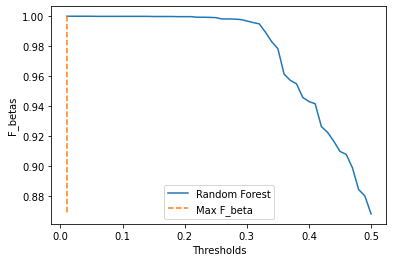

In [87]:
# first random forest model, with fBeta curve where beta=5
rfc = RandomForestClassifier(n_estimators = 9, max_depth = 6, random_state = 4444)
rfc.fit(X_resampled, y_resampled)
y_preds_rfc = rfc.predict(X_val)

pickle.dump(rfc, open( "ran_foresty_mo.p", "wb" ) )
print(classification_report(y_val, y_preds_rfc))

f_betas = []
f_max = 0
t_max = 0
for t in np.arange(1, 51)/100:
    predicted_proba = rfc.predict_proba(X_val)
    predicted = (predicted_proba[:,1] >= t).astype('int')
    f_beta = fbeta_score(y_val, predicted, beta = 5)
    f_betas.append(f_beta)
    if f_beta > f_max:
        f_max = f_beta
        max_t = t
print(max_t)
plt.plot(np.arange(1, 51)/100, f_betas, label = 'Random Forest')  
plt.plot([max_t]*len(f_betas), f_betas, linestyle='--', label = 'Max F_beta')
plt.xlabel('Thresholds')
plt.ylabel('F_betas')
plt.legend()

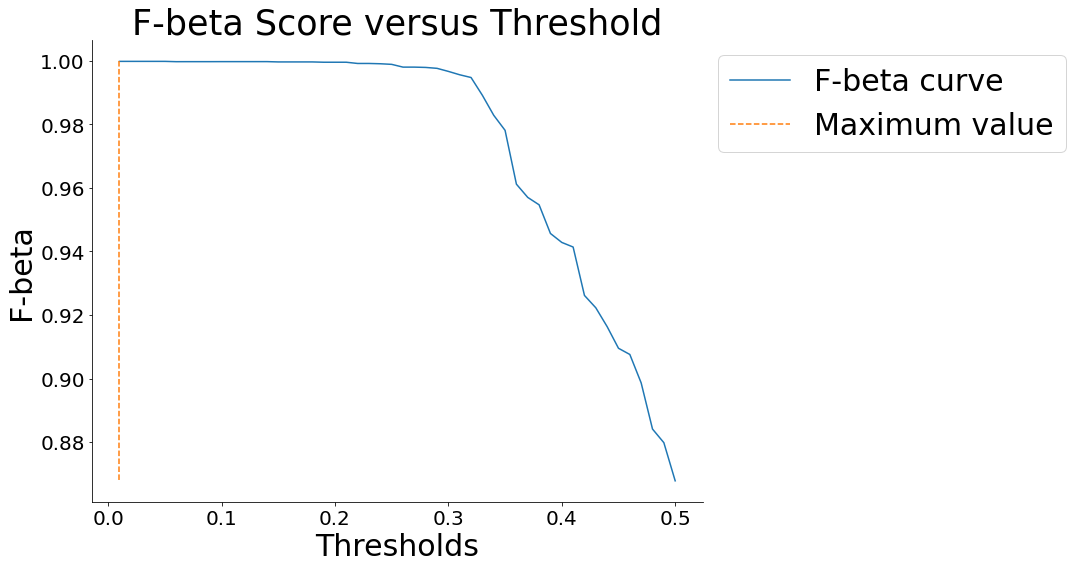

In [88]:
# larger f_beta graph
plt.figure(figsize=(15, 8))
plt.plot(np.arange(1, 51)/100, f_betas, label = 'Random Forest')  
plt.plot([max_t]*len(f_betas), f_betas, linestyle='--', label = 'Max F_beta')
plt.xlabel('Thresholds', fontsize = 30)
plt.ylabel('F-beta', fontsize = 30)
plt.legend(labels=['F-beta curve', 'Maximum value'], bbox_to_anchor=(1, 1), fontsize= 30)

plt.title("F-beta Score versus Threshold", fontsize = 35)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
sns.despine()
plt.savefig('fbetaplot.png')

Text(0, 0.5, 'Precision')

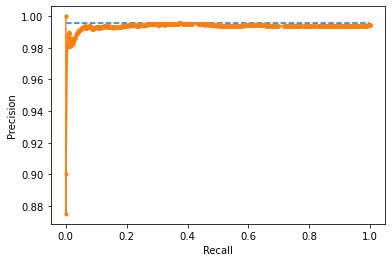

In [89]:
# precision recall curve
pos_probs = predicted_proba[:, 1]
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [90]:
#use grid search CV to find best parameters for Random Forest Classifier
cv_result = {}
best_estimators = {}
best_params = {}
    
clf = GridSearchCV(RandomForestClassifier(), 
                   param_grid = {"max_features": ["log2","Auto","None"],
                 "min_samples_split":[2,3,5],
                 "min_samples_leaf":[1,3,5],
                 "bootstrap":[True,False],
                 "n_estimators":[5, 10, 50,100,150],
                 'max_depth' : [3, 5, 7, 9],
                 "criterion":["gini","entropy"]},
                   cv =10, scoring = 'f1', 
                   n_jobs = -1, 
                   verbose = False)

clf.fit(X_resampled,y_resampled)
cv_result = clf.best_score_
best_estimators = clf.best_estimator_
best_params = clf.best_params_

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
14400 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C

In [91]:
print(best_params)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [92]:
y_pred =  best_estimators.fit(X_resampled,y_resampled).predict(X_val)

F1S=accuracy_score(y_pred, y_val)

print('f1 score :', "%.3f" %F1S)

f1 score : 0.935


In [93]:
from sklearn import preprocessing

In [94]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.58      0.04      0.08       659
           1       0.94      1.00      0.97      9341

    accuracy                           0.93     10000
   macro avg       0.76      0.52      0.52     10000
weighted avg       0.91      0.93      0.91     10000



The threshold with highest F-beta is:  0.01
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       1.00      1.00      1.00      9952

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.99      1.00      0.99     10000



C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.15

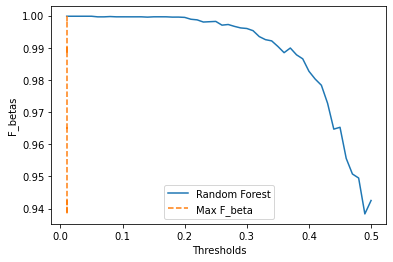

In [95]:
f_betas = []
f_max = 0
t_max = 0
for t in np.arange(1, 51)/100:
    predicted_proba = best_estimators.fit(X_resampled,y_resampled).predict_proba(X_val)
    predicted = (predicted_proba[:,1] >= t).astype('int')
    f_beta = fbeta_score(y_val, predicted, beta = 5)
    f_betas.append(f_beta)
    if f_beta > f_max:
        f_max = f_beta
        max_t = t
print('The threshold with highest F-beta is: ', max_t)
print(classification_report(y_val, (predicted_proba[:,1] >= max_t).astype('int')))
plt.plot(np.arange(1, 51)/100, f_betas, label = 'Random Forest')  
plt.plot([max_t]*len(f_betas), f_betas, linestyle='--', label = 'Max F_beta')
plt.xlabel('Thresholds')
plt.ylabel('F_betas')
plt.legend()

pickle.dump(best_estimators.fit(X_resampled,y_resampled), open( "ran_forestry_mod.p", "wb" ) )
0.15